In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [3]:
# Carregar o arquivo CSV
dataframe = pd.read_csv('files/mental-heath-in-tech-2016_20161114.csv')

# Renomear as colunas
dataframe.rename(columns={
    'What is your age?': 'age',
    'Do you work remotely?': 'remotely',
    'Which of the following best describes your work position?': 'position',
    'What is your gender?': 'gender',
    'Do you currently have a mental health disorder?': 'has_mental_disorder',
    'What country do you live in?': 'Country'
}, inplace=True)

# Selecionar apenas as colunas desejadas
df_used_columns = dataframe[['age', 'remotely', 'has_mental_disorder', 'gender', 'position', 'Country']]

# Remover espaços em branco no início e fim da coluna 'gender'
df_used_columns['gender'] = df_used_columns['gender'].str.strip()

# Filtrar apenas os países desejados
valores_desejados = ['Canada', 'United Kingdom', 'Australia', 'United States of America', 'Brazil']
df_used_columns = df_used_columns[df_used_columns['Country'].isin(valores_desejados)]

# Salvar o DataFrame filtrado em um arquivo Excel
df_used_columns.to_excel('Mental_Health_sample.xlsx', sheet_name='sheet1')

# Exibir o DataFrame filtrado
df_used_columns


,age,remotely,has_mental_disorder,gender,position,Country
0,39,Sometimes,No,Male,Back-end Developer,United Kingdom
1,29,Never,Yes,male,Back-end Developer|Front-end Developer,United States of America
2,38,Always,No,Male,Back-end Developer,United Kingdom
3,43,Sometimes,Yes,male,Supervisor/Team Lead,United Kingdom
4,43,Sometimes,Yes,Female,Executive Leadership|Supervisor/Team Lead|Dev ...,United States of America
...,...,...,...,...,...,...
1428,34,Sometimes,No,Female,Other,United States of America
1429,56,Sometimes,No,MALE,Support,United States of America
1430,52,Sometimes,Maybe,Male,Back-end Developer,United States of America
1431,30,Sometimes,Yes,Female,DevOps/SysAdmin,United States of America


In [4]:

def fill_gender(var):
        if var == 'Dude' or var == 'M' or var == 'Male' or var == 'male' or var == 'M|' or var == 'mail' or var == 'man':
            return 'Male'
        elif var == 'F' or var == 'Female' or var == 'female' or var == 'Woman' or var == 'female/woman' or var == 'fem' or var == 'fm':
            return 'Female'
        else:
            return 'other'
        

In [5]:
# Carregar o arquivo Excel e pular a primeira linha
mental_health_excel = pd.read_excel('Mental_Health_sample.xlsx', skiprows=1)

# Renomear as colunas do DataFrame
mental_health_excel.columns = ['', 'age', 'remotely', 'has_mental_disorder', 'gender', 'position', 'Country']

# Aplicar uma função para preencher a coluna 'fill_gender'
mental_health_excel['fill_gender'] = mental_health_excel['gender'].apply(fill_gender)

# Exibir as primeiras linhas do DataFrame
mental_health_excel.head()

# Remover a coluna 'gender'
mental_health_excel.drop('gender', axis=1, inplace=True)

# Salvar o DataFrame em um arquivo CSV
mental_health_excel.to_csv('files/mental_health_complete.csv')

# Exibir o DataFrame atualizado
mental_health_excel


,,age,remotely,has_mental_disorder,position,Country,fill_gender
0,1,29,Never,Yes,Back-end Developer|Front-end Developer,United States of America,Male
1,2,38,Always,No,Back-end Developer,United Kingdom,other
2,3,43,Sometimes,Yes,Supervisor/Team Lead,United Kingdom,Male
3,4,43,Sometimes,Yes,Executive Leadership|Supervisor/Team Lead|Dev ...,United States of America,Female
4,5,42,Sometimes,Yes,DevOps/SysAdmin|Support|Back-end Developer|Fro...,United Kingdom,Male
...,...,...,...,...,...,...,...
1137,1428,34,Sometimes,No,Other,United States of America,other
1138,1429,56,Sometimes,No,Support,United States of America,other
1139,1430,52,Sometimes,Maybe,Back-end Developer,United States of America,Male
1140,1431,30,Sometimes,Yes,DevOps/SysAdmin,United States of America,Female


In [72]:
# Lendo o arquivo Excel e pulando a primeira linha
mental_health_excel = pd.read_excel('Mental_Health_sample.xlsx', skiprows=1)

# Renomeando as colunas
mental_health_excel.columns = ['','age', 'remotely', 'has_mental_disorder', 'gender', 'position', 'Country']

# Aplicando a função fill_gender à coluna 'gender' e criando a nova coluna 'fill_gender'
mental_health_excel['fill_gender'] = mental_health_excel['gender'].apply(fill_gender)

# Removendo a coluna 'gender'
del mental_health_excel['gender']

# Salvando o DataFrame em um arquivo CSV
mental_health_excel.to_csv('files/mental_health_complete.csv')

# Removendo o arquivo Excel
os.remove('./Mental_Health_sample.xlsx')

# Exibindo o DataFrame final
mental_health_excel


,,age,remotely,has_mental_disorder,position,Country,fill_gender
0,1,29,Never,Yes,Back-end Developer|Front-end Developer,United States of America,Male
1,2,38,Always,No,Back-end Developer,United Kingdom,other
2,3,43,Sometimes,Yes,Supervisor/Team Lead,United Kingdom,Male
3,4,43,Sometimes,Yes,Executive Leadership|Supervisor/Team Lead|Dev ...,United States of America,Female
4,5,42,Sometimes,Yes,DevOps/SysAdmin|Support|Back-end Developer|Fro...,United Kingdom,Male
...,...,...,...,...,...,...,...
1427,1428,34,Sometimes,No,Other,United States of America,other
1428,1429,56,Sometimes,No,Support,United States of America,other
1429,1430,52,Sometimes,Maybe,Back-end Developer,United States of America,Male
1430,1431,30,Sometimes,Yes,DevOps/SysAdmin,United States of America,Female


<Figure size 1600x500 with 0 Axes>

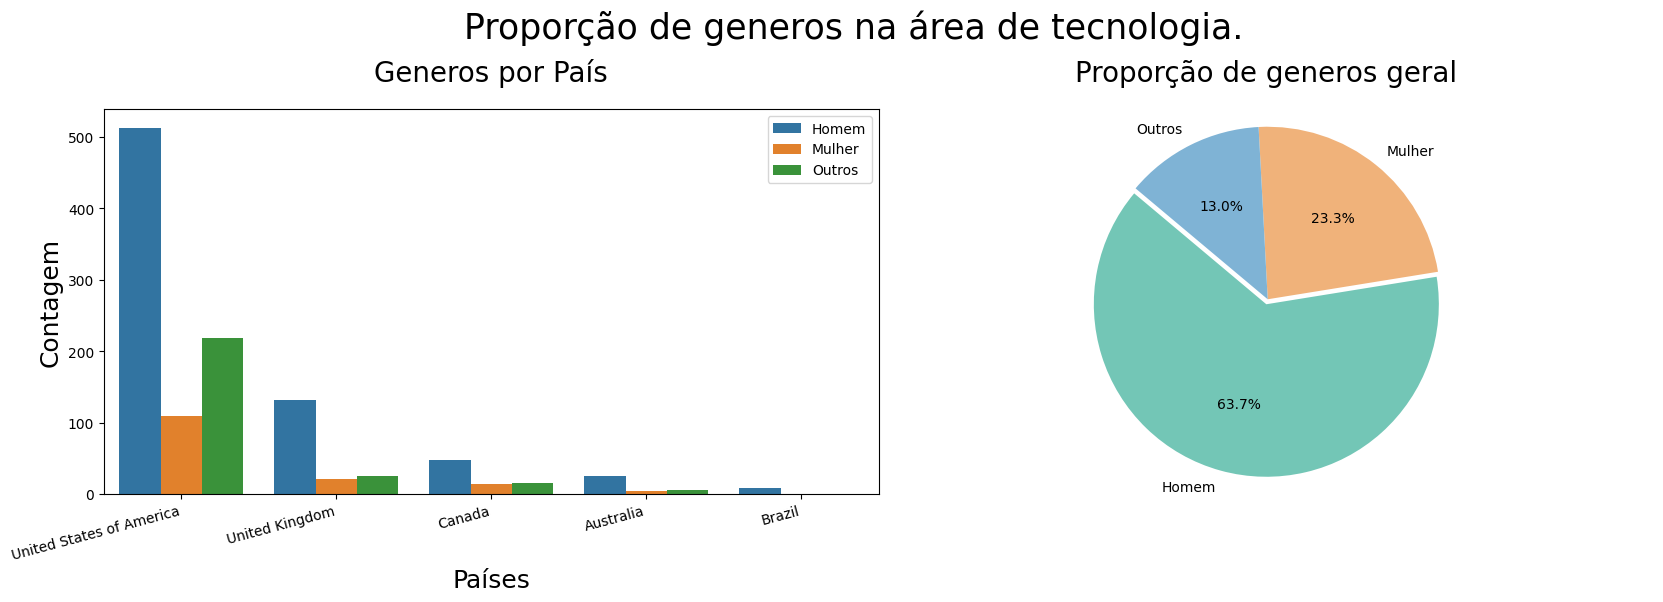

In [6]:
# Definir as opções desejadas para a coluna 'Country'
opcoes_desejadas = ['Brazil', 'United Kingdom', 'United States of America', 'Canada', 'Ireland', 'Australia']

# Filtrar o DataFrame para manter apenas os países desejados
mental_health_filtered = mental_health_excel[mental_health_excel['Country'].isin(opcoes_desejadas)]

# Criar a figura e os subplots
plt.figure(figsize=(16, 5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace=0)
fig.suptitle('Proporção de gêneros na área de tecnologia', fontsize=25, y=1.08)

# Pie Chart - Proporção de gêneros geral
all_techs = mental_health_filtered['fill_gender'].count()
males = mental_health_filtered['fill_gender'].value_counts()['Male']
females = mental_health_filtered['fill_gender'].value_counts()['Female']
other = mental_health_filtered['fill_gender'].value_counts()['other']

labels = ['Homem', 'Mulher', 'Outros']
sizes = [males / all_techs, females / all_techs, other / all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # Explodir o primeiro pedaço

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Proporção de gêneros geral', pad=20, fontsize=20)

# Bar Chart - Gêneros por país
sns.countplot(x='Country', hue='fill_gender', data=mental_health_filtered, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha='right')
ax1.set_title('Gêneros por País', pad=20, fontsize=20)
ax1.set_xlabel('Países', fontsize=18)
ax1.set_ylabel('Contagem', fontsize=18)
ax1.legend(['Homem', 'Mulher', 'Outros'])

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14760\2333597034.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


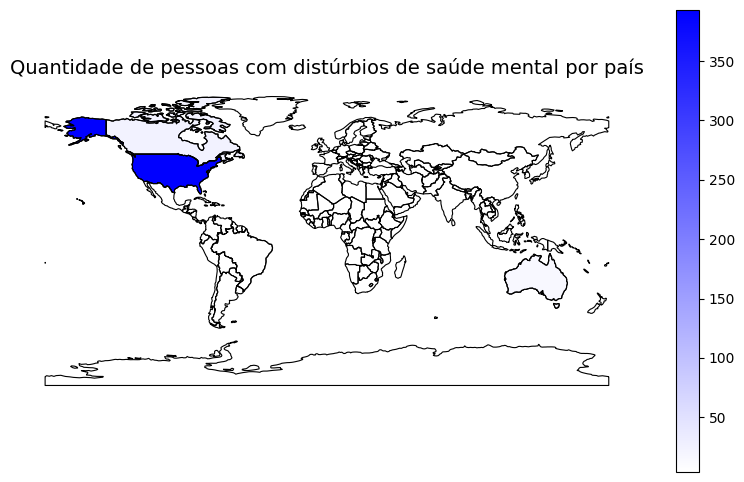

In [33]:
# Carregar os dados do mapa
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Criar o DataFrame com os dados da contagem
count = mental_health_excel[mental_health_excel['has_mental_disorder'] == 'Yes'].groupby('Country').size().reset_index(name='Count')

# Criar um DataFrame com os dados dos países e contagem
data = {
    'Country': ['Brazil', 'United States of America', 'Canada', 'Australia', 'Reino Unido'],
    'Count': [count.loc[count['Country'] == 'Brazil', 'Count'].item(),
              count.loc[count['Country'] == 'United States of America', 'Count'].item(),
              count.loc[count['Country'] == 'Canada', 'Count'].item(),
              count.loc[count['Country'] == 'Australia', 'Count'].item(),
              count.loc[count['Country'] == 'United Kingdom', 'Count'].item()]
}

df = pd.DataFrame(data)

# Juntar os dados do mapa com o DataFrame
merged_data = world_map.merge(df, left_on='name', right_on='Country')

# Criar um colormap personalizado (azul)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#FFFFFF', '#0000FF'])

# Criar o gráfico de mapa
fig, ax = plt.subplots(figsize=(10, 6))
world_map.boundary.plot(ax=ax, linewidth=0.8, color='black')  # Contorno dos países
merged_data.plot(column='Count', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black', legend=True)

# Adicionar título e rótulo
ax.set_title('Quantidade de pessoas com distúrbios de saúde mental por país', fontdict={'fontsize': 14})
ax.set_axis_off()

# Exibir o gráfico
plt.show()
